![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 4 - Performance Evaluation </center>
### <center> Precision, Recall, ROC, and AUC</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/04_PerformanceEvaluation/MainPrecisionRecall1%20-%20Solution.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rc('font', **{'size':16})
# np.random.seed(1)

In [2]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc
from sklearn.svm     import SVC

### Exercise
* Use the breast cancer dataset: `load_breast_cancer`.
* Use a linear SVM classifier.
* Use cross-validation to find a good value of $C$ which maximizes the AUC. 
    * use the following signature:  
        `cross_val_score(SVC(C=C, kernel='linear'), mX, vY, cv=20, scoring=AucScore)`  
* Implement AucScore(oSVM, mX, vY). The output should be the AUC

In [3]:
from sklearn.datasets import load_breast_cancer

dData = load_breast_cancer()
mX    = dData.data
vY    = dData.target

#-- Normalize data:
mX    = mX - np.mean(mX, axis=0)
mX    = mX / np.std (mX, axis=0)

vY[vY == 0] = -1

In [4]:
import pandas as pd
from   sklearn.model_selection import cross_val_score, KFold

def AucScore(oSVM, mX, vY):
    vScore       = oSVM.decision_function(mX)
    vFP, vTP, _  = roc_curve(vY, vScore, pos_label=1)
    AUC          = auc(vFP, vTP)
    return AUC

dRes = pd.DataFrame(columns=['C', 'AUC'])

for C in np.linspace(1e-3, 10, 25):
    vAUC                = cross_val_score(SVC(C=C, kernel='linear'), mX, vY, cv=KFold(20, shuffle=True), scoring=AucScore)
    dRes.loc[len(dRes)] = [C, np.mean(vAUC)]

dRes.sort_values(by='AUC', ascending=False)


,C,AUC
6,2.500750,0.995638
2,0.834250,0.995545
1,0.417625,0.994740
7,2.917375,0.994687
3,1.250875,0.994180
8,3.334000,0.994095
4,1.667500,0.993729
21,8.750125,0.992956
13,5.417125,0.992881
19,7.916875,0.992755


In [5]:
oSVM  = SVC(C=1.66, kernel='linear').fit(mX, vY)

In [6]:
vScore         = oSVM.decision_function(mX)
vFP, vTP, vThr = roc_curve(vY, vScore, pos_label=1)
AUC            = auc(vFP, vTP)

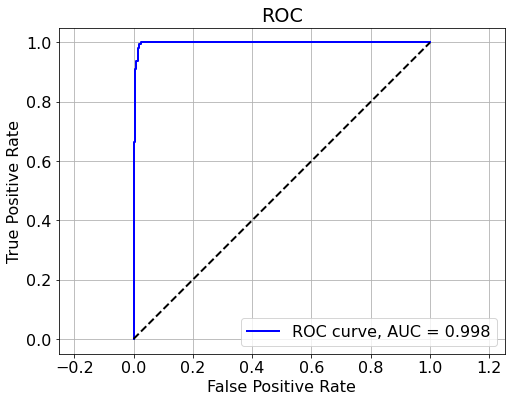

In [7]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.plot(vFP,    vTP,    color='b', lw=2, label=f'ROC curve, AUC = {AUC:.3f}')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.axis('equal')
plt.legend()
plt.show()